In [9]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import math 
# 0: Empty
# 1: Start point
# 2: End point
# 3: Gate zone
# 4: Barrier
# 5: Last gate zone 

grid = np.array([
   # C0 C1 C2 C3 C4 C5 C6 C7 C8
    [5, 0, 2, 4, 3, 0, 0, 0, 3],  # R0
    [0, 9, 0, 9, 0, 9, 4, 9, 0],  # R1
    [0, 0, 0, 4, 0, 4, 0, 4, 0],  # R2
    [4, 9, 0, 9, 0, 9, 0, 9, 0],  # R3
    [0, 0, 0, 0, 0, 0, 3, 4, 0],  # R4
    [0, 9, 4, 9, 4, 9, 4, 9, 0],  # R5
    [0, 0, 3, 0, 0, 0, 0, 0, 1]   # R6
])

rows, cols = grid.shape
start_pos = None
end_pos = None
gate3_locs = []
gate5_pos = None

for r_idx in range(rows):
    for c_idx in range(cols):
        if grid[r_idx, c_idx] == 1:
            start_pos = (r_idx, c_idx)
        elif grid[r_idx, c_idx] == 2:
            end_pos = (r_idx, c_idx)
        elif grid[r_idx, c_idx] == 3:
            gate3_locs.append((r_idx, c_idx))
        elif grid[r_idx, c_idx] == 5:
            gate5_pos = (r_idx, c_idx)

if not start_pos: raise ValueError("Start position (1) not found in grid.")
if not end_pos: raise ValueError("End position (2) not found in grid.")
if not gate5_pos: raise ValueError("Last gate (5) not found in grid.")

print(f"Start: {start_pos}")
print(f"End: {end_pos}")
print(f"Gates: {gate3_locs}")
print(f"Last Gate: {gate5_pos}")

Start: (6, 8)
End: (0, 2)
Gates: [(0, 4), (0, 8), (4, 6), (6, 2)]
Last Gate: (0, 0)


In [10]:
def bfs(grid_map, start_node, target_nodes_set):
    q = collections.deque([(start_node, [start_node])])
    visited = {start_node}
    map_rows, map_cols = grid_map.shape

    moves = [(-2, 0), (2, 0), (0, 2), (0, -2)]

    while q:
        (curr_r, curr_c), path = q.popleft()

        if (curr_r, curr_c) in target_nodes_set:
            return path, (curr_r, curr_c) 

        for dr, dc in moves:
            next_r, next_c = curr_r + dr, curr_c + dc

            if 0 <= next_r < map_rows and 0 <= next_c < map_cols:
                wall_r, wall_c = curr_r + dr // 2, curr_c + dc // 2

                if grid_map[wall_r, wall_c] == 4:
                    continue

                if grid_map[next_r, next_c] != 4 and (next_r, next_c) not in visited:
                    visited.add((next_r, next_c))
                    new_path = list(path)
                    new_path.append((next_r, next_c))
                    q.append(((next_r, next_c), new_path))
    
    return None, None

In [11]:
full_path = []
current_pos = start_pos

full_path.append(start_pos)

gates = set(gate3_locs)

while gates:
    if current_pos in gates:
        gates.remove(current_pos)
        if not gates:
            break

    path_segment, found_gate = bfs(grid, current_pos, gates)
    
    if not path_segment:
        raise Exception(f"Pathfinding failed: Cannot reach any remaining gate from {current_pos}. Targets left: {gates}")

    if len(path_segment) > 1:
        full_path.extend(path_segment[1:])
    
    current_pos = found_gate
    if found_gate in gates:
         gates.remove(found_gate)

if gate5_pos:
    if current_pos != gate5_pos:
        path_segment, _ = bfs(grid, current_pos, {gate5_pos})
        if not path_segment:
            raise Exception(f"Pathfinding failed: Cannot reach Final Gate {gate5_pos} from {current_pos}")
        if len(path_segment) > 1:
            full_path.extend(path_segment[1:])
    current_pos = gate5_pos

if end_pos:
    if current_pos != end_pos:
        path_segment, _ = bfs(grid, current_pos, {end_pos})
        if not path_segment:
            raise Exception(f"Pathfinding failed: Cannot reach End Point {end_pos} from {current_pos}")
        if len(path_segment) > 1:
            full_path.extend(path_segment[1:])
    # current_pos = end_pos

print(f"Final Path: {full_path}")
%store full_path

Final Path: [(6, 8), (4, 8), (2, 8), (0, 8), (0, 6), (0, 4), (2, 4), (4, 4), (4, 6), (4, 4), (4, 2), (4, 0), (6, 0), (6, 2), (6, 0), (4, 0), (4, 2), (2, 2), (0, 2), (0, 0), (0, 2)]
Stored 'full_path' (list)


Total path length: 21


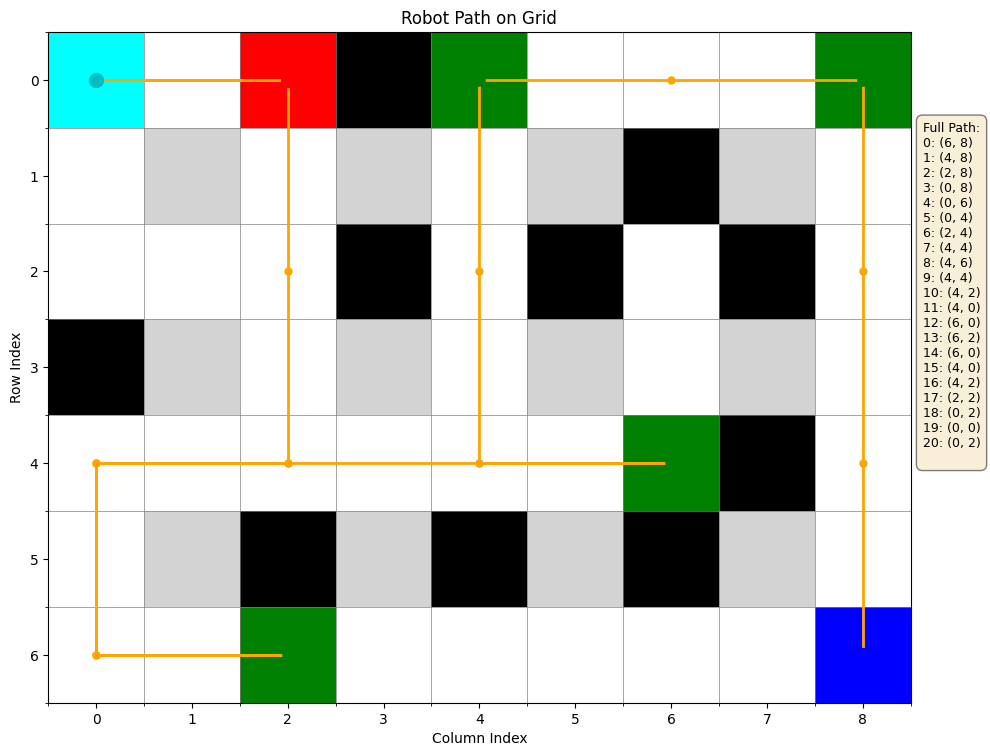

In [12]:
print(f"Total path length: {len(full_path)}")
if not full_path:
    print("Full path is empty. Nothing to plot.")
else:
    fig, ax = plt.subplots(figsize=(15, 12))

    plt.subplots_adjust(right=0.7) 

    cmap = matplotlib.colors.ListedColormap(['white', 'blue', 'red', 'green', 'black', 'cyan', 'lightgray'])
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 9.5]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    ax.imshow(grid, cmap=cmap, norm=norm, origin='lower', interpolation='nearest')
    
    path_rows = [p[0] for p in full_path]
    path_cols = [p[1] for p in full_path]

    ax.plot(path_cols, path_rows, 'orange', marker='o', linestyle='-', linewidth=2, markersize=5)

    if start_pos:
        ax.plot(start_pos[1], start_pos[0], 'bo', markersize=10)
    if end_pos:
        ax.plot(end_pos[1], end_pos[0], 'ro', markersize=10)
    if gate3_locs:
        for gate_idx, gate in enumerate(gate3_locs):
            ax.plot(gate[1], gate[0], 'go', markersize=8)
    if gate5_pos:
        ax.plot(gate5_pos[1], gate5_pos[0], 'co', markersize=10)

    ax.set_xticks(np.arange(-.5, grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, grid.shape[0], 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)

    ax.set_xticks(np.arange(0, grid.shape[1], 1))
    ax.set_yticks(np.arange(0, grid.shape[0], 1))

    ax.set_title("Robot Path on Grid")
    ax.set_xlabel("Column Index")
    ax.set_ylabel("Row Index")
    ax.invert_yaxis()

    path_text = "Full Path:\n"
    for i, point in enumerate(full_path):
        path_text += f"{i}: {point}\n"
    
    fig.text(0.708, 0.7, path_text, fontsize=9, va='top', ha='left', 
             bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()